### Python Setup

In [2]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# seaborn settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

### Data

In [3]:
# import data
ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "height.csv"

df = pd.read_csv(ROOT + DATA)

In [4]:
# show head of dataframe
df.head()

,name,id,height,average_height_parents,gender
0,Stefanie,1,162,161,female
1,Peter,2,163,163,male
2,Stefanie,3,163,163,female
3,Manuela,4,164,165,female
4,Simon,5,164,163,male


In [5]:
# show tail of dataframe
df.tail()

,name,id,height,average_height_parents,gender
15,Marc,16,166,166,male
16,Ralph,17,166,166,male
17,Tom,18,167,166,male
18,Steven,19,167,167,male
19,Emanuel,20,168,168,male


In [6]:
# data overview (metadata)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    20 non-null     object
 1   id                      20 non-null     int64 
 2   height                  20 non-null     int64 
 3   average_height_parents  20 non-null     int64 
 4   gender                  20 non-null     object
dtypes: int64(3), object(2)
memory usage: 928.0+ bytes


In [7]:
# show all variables
df.columns

Index(['name', 'id', 'height', 'average_height_parents', 'gender'], dtype='object')

### Tidying Data

In [8]:
# change data types
df["name"] = pd.Categorical(df["name"])
df["id"] = pd.Categorical(df["id"])
df["gender"] = pd.Categorical(df["gender"])

df.rename(columns = {
    "average_height_parents": "height_parents"},
    inplace=True
    )

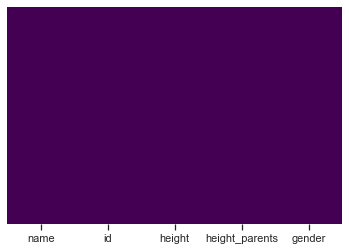

In [9]:
# show missing values (will be displayed in yellow)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis");

In [10]:
# check column-wise distribution of null values
print(df.isnull().sum())

name              0
id                0
height            0
height_parents    0
gender            0
dtype: int64


### Transform Data

In [11]:
# summary statistics for all numerical columns
round(df.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
height,20.0,165.00,1.49,162.0,164.0,165.0,166.0,168.0
height_parents,20.0,165.05,1.67,161.0,164.0,165.0,166.0,168.0


In [12]:
# grouped summary statistics for all numerical columns
df.groupby(["gender"]).describe().T

gender                    female        male
height         count   11.000000    9.000000
               mean   164.363636  165.777778
               std      1.120065    1.563472
               min    162.000000  163.000000
               25%    164.000000  165.000000
               50%    165.000000  166.000000
               75%    165.000000  167.000000
               max    166.000000  168.000000
height_parents count   11.000000    9.000000
               mean   164.636364  165.555556
               std      1.629278    1.666667
               min    161.000000  163.000000
               25%    164.000000  165.000000
               50%    165.000000  166.000000
               75%    165.500000  166.000000
               max    167.000000  168.000000

In [13]:
# summary statistics for all categorical columns
df.describe(include=["category"])

,name,id,gender
count,20,20,20
unique,19,20,2
top,Stefanie,1,female
freq,2,1,11


### Visualize Data

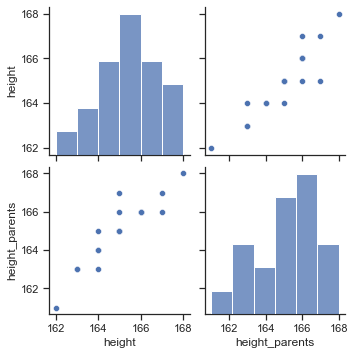

In [15]:
# histogram with seaborn
sns.pairplot(data=df);

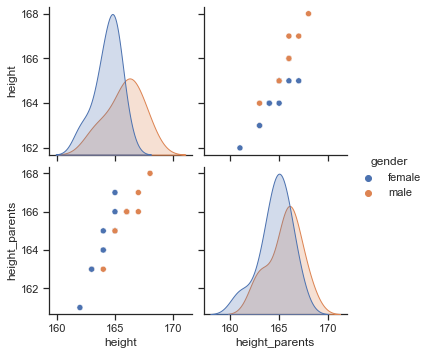

In [16]:
# histogram with seaborn
sns.pairplot(data=df, hue="gender");

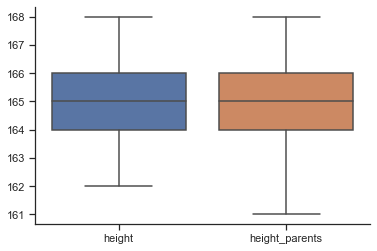

In [17]:
# boxplot
sns.boxplot(data=df);

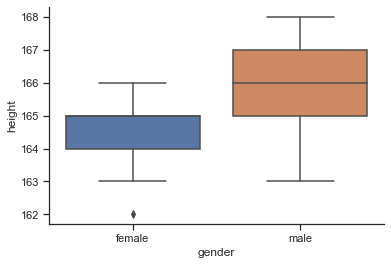

In [18]:
# boxplot
sns.boxplot(data=df, y="height", x="gender");

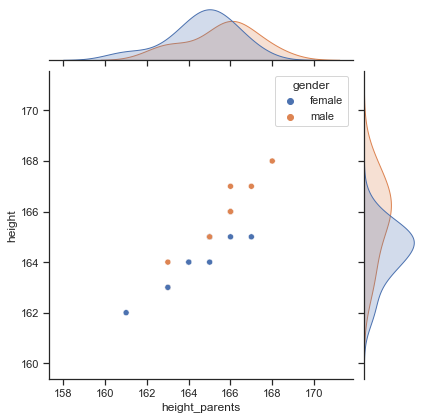

In [19]:
# check relaionship with a joint plot
sns.jointplot(x="height_parents", y ="height", hue="gender", data=df)

### Mean

In [20]:
# calculate the mean
df["height"].mean()

165.0

In [21]:
# add the mean (average) to the DataFrame
df = df.assign(average = df["height"].mean())

df.head()

,name,id,height,height_parents,gender,average
0,Stefanie,1,162,161,female,165.0
1,Peter,2,163,163,male,165.0
2,Stefanie,3,163,163,female,165.0
3,Manuela,4,164,165,female,165.0
4,Simon,5,164,163,male,165.0


Text(1, 165.2, 'mean = 165')

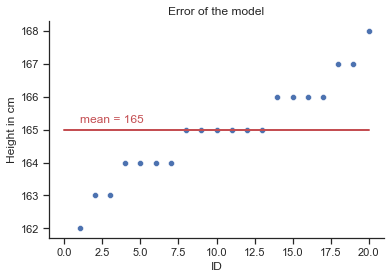

In [22]:
# create scatterplot
plt = sns.scatterplot(x="id", y ="height", data=df);

# labels and title
plt.set(xlabel="ID", ylabel="Height in cm", title="Error of the model");

# add our mean value
plt.plot([0, 20], [165, 165], linewidth=2, color="r");
plt.text(1, 165.2, "mean = 165", rotation=0, color="r")


### Regression Model

In [23]:
# fit linear model with statsmodels.formular.api
lm = smf.ols(formula="height ~ height_parents", data=df).fit()

# add the regression predictions (as "pred") to DataFrame
df["pred"] = lm.predict()

In [24]:
df.head()

,name,id,height,height_parents,gender,average,pred
0,Stefanie,1,162,161,female,165.0,161.711048
1,Peter,2,163,163,male,165.0,163.335222
2,Stefanie,3,163,163,female,165.0,163.335222
3,Manuela,4,164,165,female,165.0,164.959396
4,Simon,5,164,163,male,165.0,163.335222


In [25]:
# summary of regression results
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     88.78
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           2.21e-08
Time:                        10:09:35   Log-Likelihood:                -17.995
No. Observations:                  20   AIC:                             39.99
Df Residuals:                      18   BIC:                             41.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         30.9651     14.226      2.177      0.043       1.077      60.853
height_parents     0.8121      0.086      9.422      0.000       0.631       0.993
==============================================================================
Omnibus:                        4.700   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                2.492
Skew:                          -0.684   Prob(JB):                        0.288
Kurtosis:                       4.058   Cond. No.                     1.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# example of how regression works

# parameters
b_0 = 30.9651
b_1 = 0.8121

# make a prediction for X = 200
X = 200

prediction = b_0 + b_1*(X)

print(round(prediction, 2))

193.39


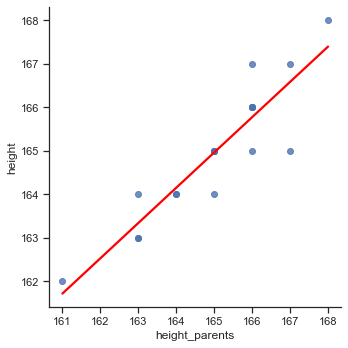

In [27]:
# plot regression line
sns.lmplot(x="height_parents", y ="height", data=df, line_kws={"color": "red"}, height=5, ci=None);